# Online_Shoppers_Intention

Online Shoppers Intention
Problem Statement:
Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  Analyse and compare the clusters formed with the existing Revenue Column.
Data Set Information:
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.
Attribute Information:
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
Citation / Reference:
Please use the below link to cite this dataset:
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).
https://link.springer.com/article/10.1007/s00521-018-3523-0
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Expected Approach/Outcomes:
Perform required cleaning to bring the uniformity in the data.
Carry-out uni-variate, Bi-variate and Multti-varaiate analysis to understand the data relationships.
Perform required missing value treatment
Perform Outlier treatment if required
Perform appropriate scaling
Perform required encoding techniques
Build the different cluster models.
Analyse the optimum number of cluster using appropriate techniques.
Make the appropriate business interpretation using the cluster centroids.
Perform the EDA on cluster groups to understand the cluster characteristics.
Perform PCA and apply clustering on top of it. Comment whether PCA is really helping the clustering process.  
Also try different graphs to visualize the clusters and its characteristics. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
print(df['VisitorType'].unique())
print(df['Weekend'].unique())
print(df['Revenue'].unique())

['Returning_Visitor' 'New_Visitor' 'Other']
[False  True]
[False  True]


In [6]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [7]:
df['Revenue']=[1 if i==True else 0 for i in df['Revenue']]
df['Weekend']=[1 if i==True else 0 for i in df['Weekend']]
df['VisitorType']=df['VisitorType'].replace({"Returning_Visitor":0,'New_Visitor':1,'Other':2})  


<AxesSubplot:>

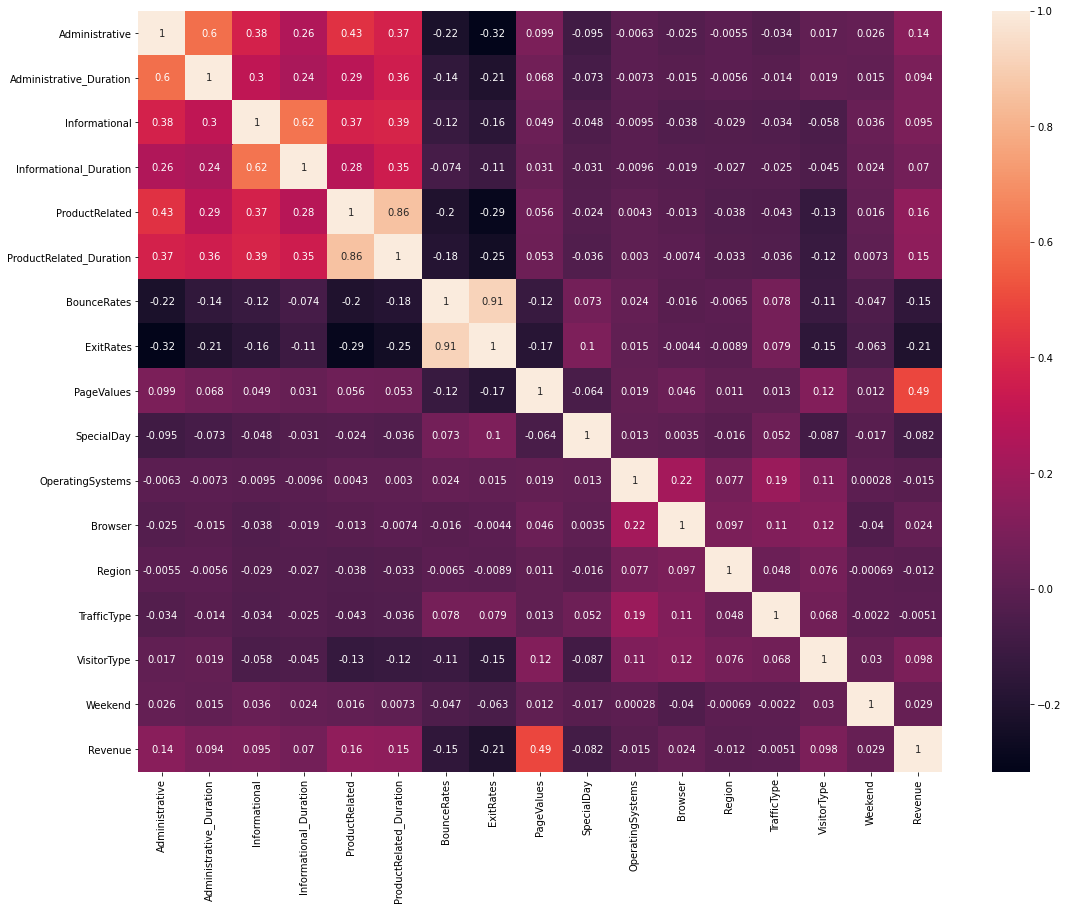

In [8]:
#multicolliearity check
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(),annot=True)

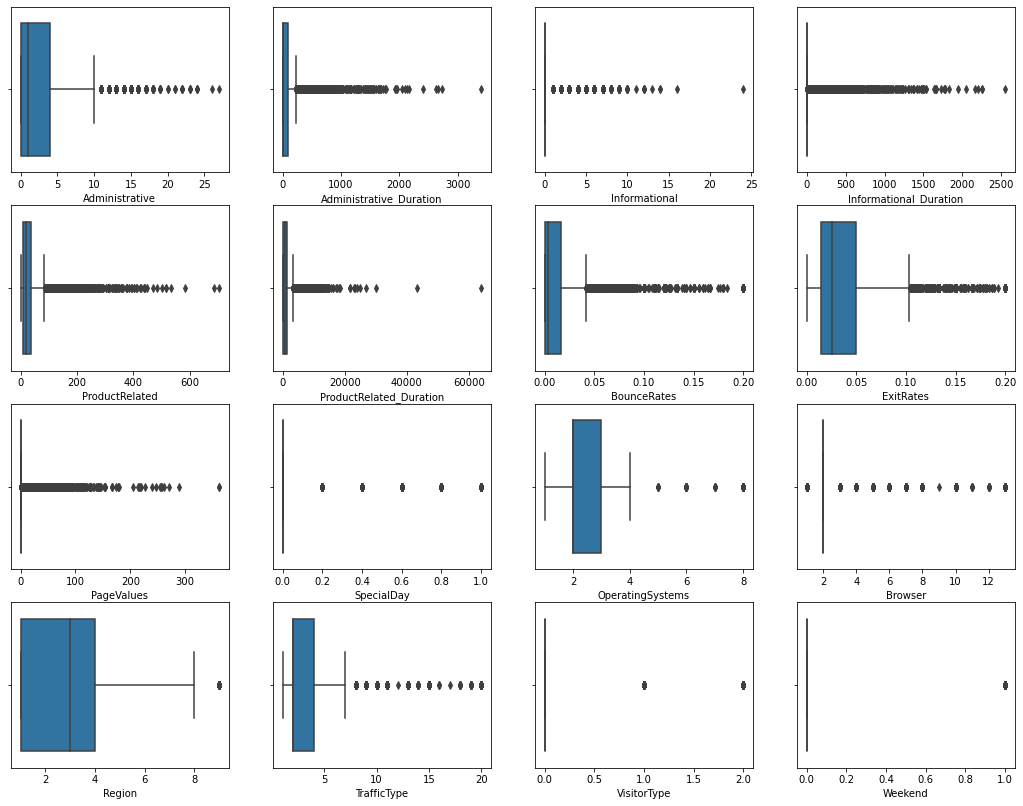

In [9]:
# checking for outliers
x=df.drop('Revenue',axis=1)
j=1

plt.figure(figsize=(18,14))
for i in x.select_dtypes(include='number').columns:
    plt.subplot(4,4,j)
    sns.boxplot(x[i])
    j+=1
    
    

In [10]:
#Scaling is required

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
for i in x.select_dtypes(include='number').columns:
    x[i]=st.fit_transform(x[[i]])


<AxesSubplot:xlabel='Administrative_Duration', ylabel='Administrative'>

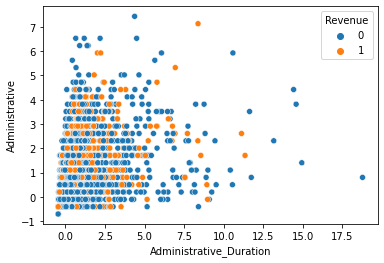

In [11]:
sns.scatterplot(x.Administrative_Duration,x.Administrative,hue=df.Revenue) # we can see lot of over 
#laping we are geeting lot of data loss
# First we we not use ther target column

<AxesSubplot:xlabel='Number of cluster'>

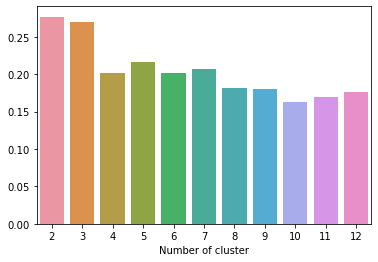

In [12]:
x=x.select_dtypes(include='number')
from sklearn import metrics
from sklearn.cluster import KMeans

shiloutte_coefficient=[]
for i in range(2,13):
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit(x)
    y_pred=kmeans.predict(x)
    score=metrics.silhouette_score(x,y_pred,random_state=10)
    shiloutte_coefficient.append(score)
    

shiloutte=pd.DataFrame()
shiloutte['Number of cluster']=range(2,13)
shiloutte['Shilloutte coeffiecent']=shiloutte_coefficient
sns.barplot(shiloutte['Number of cluster'],shiloutte_coefficient)

In [18]:
#aggromative clustering
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2)
y_pred=cluster.fit_predict(x)

In [15]:
#PcA
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x=pca.fit_transform(x)

new_df=pd.DataFrame(x,columns=['pc1','pc2','pc3','pc4','pc5'])


In [19]:
new_df['target']=y_pred

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

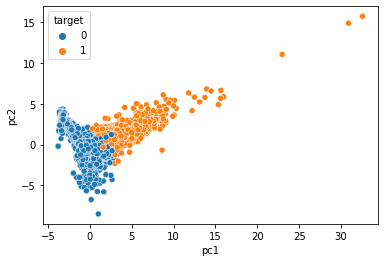

In [23]:
sns.scatterplot(new_df.pc1,new_df.pc2,hue=new_df.target) #now after pca cluster are forming properly
#chances of lossing the data is less